## IBM HR Analytics Employee Attrition Modeling .
DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

**Data Dictionary**

Age: Age of employee <br>
Attrition: Employee attrition status <br>
Department: Department of work
DistanceFromHome <br>
Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;<br>
EducationField <br>
EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High; <br>
JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High; <br>
MaritalStatus <br>
MonthlyIncome <br>
NumCompaniesWorked: Number of companies worked prior to IBM <br>
WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best; <br>
YearsAtCompany: Current years of service in IBM   <br>

**Analysis Task:**
1: Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.<br>
2: Exploratory data analysis <br>
3: Find the age distribution of employees in IBM <br>
4: Explore attrition by age<br>
5: Explore data for Left employees <br>
6: Find out the distribution of employees by the education field <br>
7: Give a bar chart for the number of married and unmarried employees <br>
8: Build up a logistic regression model to predict which employees are likely to attrite.


In [54]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [55]:
df = pd.read_csv("IBM-Attrition-Data.csv")

In [56]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [183]:
# Dataframe any null values
df.isnull().values.any()

False

In [184]:
# Dataframe statistical overview
df.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,0.367863,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [41]:
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [60]:
names = df.columns.values
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


<AxesSubplot:xlabel='Department', ylabel='count'>

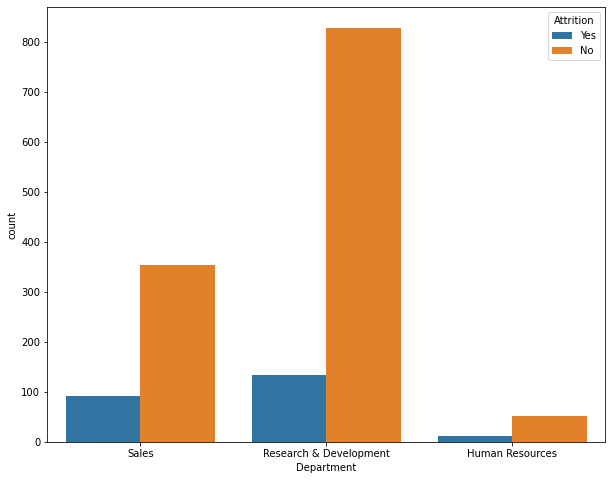

In [62]:
#Plotting Departmentwise attrition
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = 'Department', hue = 'Attrition')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

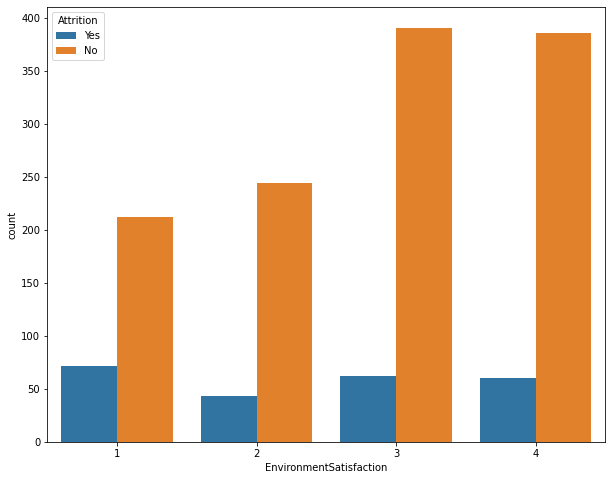

In [66]:
#Agewise attrition
plt.figure(figsize=(10,8))
sns.countplot(data=df, x ='EnvironmentSatisfaction', hue = 'Attrition')

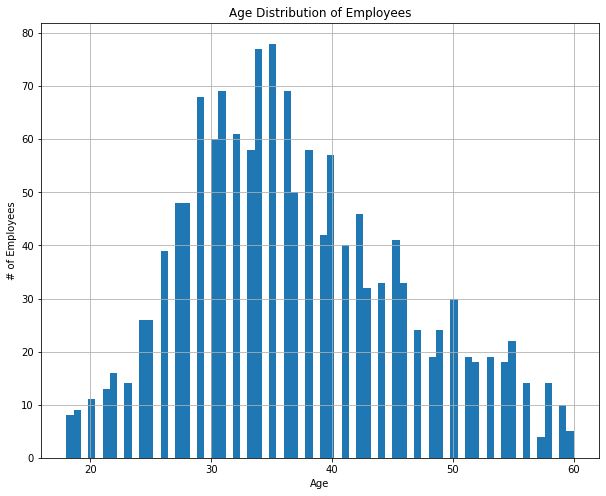

In [63]:
# histogram for age
plt.figure(figsize=(10,8))
df['Age'].hist(bins=70)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

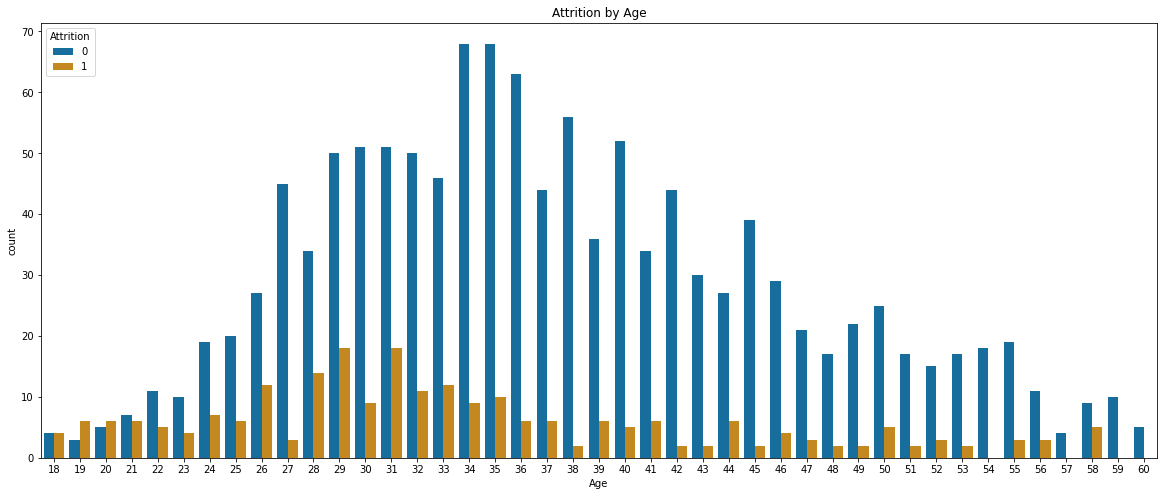

In [192]:
# Show attrition by age
plt.subplots(figsize=(20,8))
sns.countplot(x="Age", hue="Attrition", data=df, palette='colorblind').set(title='Attrition by Age');
plt.show()

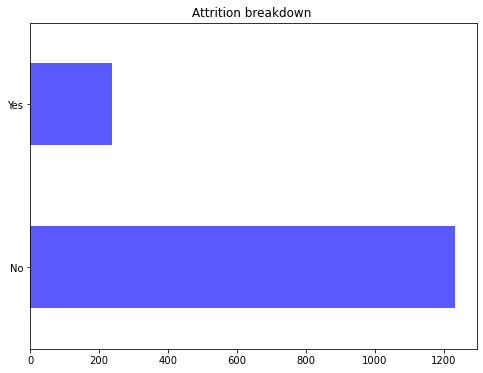

In [52]:
# explore data for Left employees breakdown
plt.figure(figsize=(8,6))
df.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Attrition breakdown ")
plt.show()

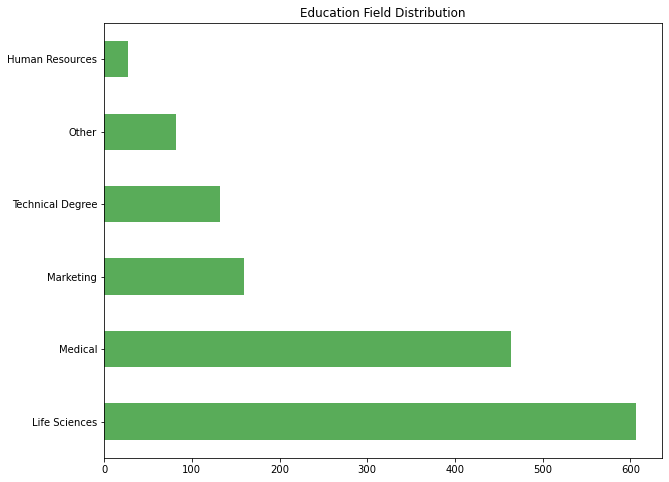

In [80]:
# explore data for Education Field distribution
plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

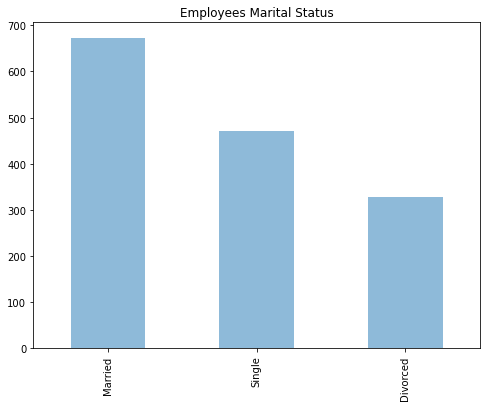

In [196]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
df.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.title('Employees Marital Status')
plt.show()

In [85]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [86]:
df['Attrition'].dtypes

dtype('O')

In [87]:
df['Attrition'].replace('Yes',1, inplace=True)
df['Attrition'].replace('No',0, inplace=True)

In [89]:
df.head(20)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [90]:
# building up a logistic regression model
X = df.drop(['Attrition'],axis=1)
X.head()
Y = df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [93]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [94]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [95]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [97]:
x.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [98]:
y=df['Attrition']

In [99]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [106]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  df, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Department[T.Research & Development]',
       'Department[T.Sales]', 'EducationField[T.Life Sciences]',
       'EducationField[T.Marketing]', 'EducationField[T.Medical]',
       'EducationField[T.Other]', 'EducationField[T.Technical Degree]', 'Age',
       'DistanceFromHome', 'Education', 'YearsAtCompany'],
      dtype='object')


In [197]:
y = np.ravel(y)

In [198]:
y.mean()

0.16122448979591836

In [216]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model=LogisticRegression()
model.fit(X_train, y_train)

/Users/justspecial/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [210]:
#Using logistic regression to predict Attretion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

logReg = LogisticRegression()
logReg = logReg.fit(X_train, y_train)
logReg_pred = logReg.predict(X_test)

# check the accuracy on the training set
logReg_accuracy = accuracy_score(y_test, logReg_pred) * 100
print('Accuracy =', logReg_accuracy,'%')

Accuracy = 84.35374149659864 %


/Users/justspecial/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
#Using Support Vector Machine to predcit Attrition
from sklearn.svm import SVC
svc = SVC()
svc = svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# check the accuracy on the training set
svm_accuracy = accuracy_score(y_test, svc_pred) * 100
print('Accuracy =', svm_accuracy, '%')

Accuracy = 84.12698412698413 %


In [217]:
predicted= model.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [219]:
probs = model.predict_proba(X_test)
print (probs)

[[0.8845354  0.1154646 ]
 [0.79354337 0.20645663]
 [0.67950916 0.32049084]
 [0.81652916 0.18347084]
 [0.71603262 0.28396738]
 [0.82854484 0.17145516]
 [0.88161239 0.11838761]
 [0.81672922 0.18327078]
 [0.96184415 0.03815585]
 [0.92958711 0.07041289]
 [0.96199923 0.03800077]
 [0.86327301 0.13672699]
 [0.85076016 0.14923984]
 [0.85469478 0.14530522]
 [0.90974712 0.09025288]
 [0.87963229 0.12036771]
 [0.87459498 0.12540502]
 [0.7684811  0.2315189 ]
 [0.77592815 0.22407185]
 [0.90724546 0.09275454]
 [0.68762488 0.31237512]
 [0.95839945 0.04160055]
 [0.89451801 0.10548199]
 [0.81944137 0.18055863]
 [0.5308997  0.4691003 ]
 [0.78210469 0.21789531]
 [0.91067011 0.08932989]
 [0.92208981 0.07791019]
 [0.72274875 0.27725125]
 [0.82671741 0.17328259]
 [0.85885594 0.14114406]
 [0.84814084 0.15185916]
 [0.88860598 0.11139402]
 [0.96611726 0.03388274]
 [0.87288137 0.12711863]
 [0.89509325 0.10490675]
 [0.87706154 0.12293846]
 [0.74096808 0.25903192]
 [0.92131906 0.07868094]
 [0.79090053 0.20909947]


In [221]:
# from sklearn import metrics
# print (metrics.accuracy_score(y_test, predicted) * 100, '%')
# print (metrics.roc_auc_score(y_test, probs[:, 1]))

In [123]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [128]:
print (X_train)      

      Intercept  Department[T.Research & Development]  Department[T.Sales]  \
338         1.0                                   0.0                  1.0   
363         1.0                                   0.0                  1.0   
759         1.0                                   0.0                  0.0   
793         1.0                                   1.0                  0.0   
581         1.0                                   1.0                  0.0   
...         ...                                   ...                  ...   
763         1.0                                   0.0                  1.0   
835         1.0                                   0.0                  0.0   
1216        1.0                                   0.0                  1.0   
559         1.0                                   1.0                  0.0   
684         1.0                                   0.0                  1.0   

      EducationField[T.Life Sciences]  EducationField[T.Marketi

In [155]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0, 2.0, 3.0, 5.0, 4.0, 28.0]]
print(model.predict_proba(kk))

[[1.00000000e+00 4.21842405e-56]]
